**Be carefull before you run this whole notebook be aware that it takes several hours to be executed**

Please note that since this notebook has been written several reexecution of the code has been made that's why you wont find the exact same results that the ones given in the comments or in the markdown session. Normally we've checked that the new results are consistent and close to was is stated in the comments.

Have a Nice reading :) 

# Introduction 

Our dataset is composed of 5 files, as those file are pretty big we will take our time and analyse the first file and then we will genralise what we've seen for the first file for all the others

In [19]:
from scipy.io import arff
import pandas as pd
import plotly.express as pex

data = arff.loadarff('1year.arff')
rawdata = pd.DataFrame(data[0])

rawdata.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,b'0'
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,b'0'
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,b'0'
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,b'0'
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,b'0'


We have 64 variables to take into accounnt all of type float plus the class column

In [20]:
rawdata.dtypes.value_counts()

float64    64
object      1
dtype: int64

In [21]:
rawdata["class"].describe()
print(1-(6756/7027))

0.038565532944357495


In [22]:
import time
tm = time.perf_counter()
print(tm)

300.9549959


With the parameter optimization this notebook can take a lot of time to execute this is just a timer to keep track of time to process the notebook (which is around 10 hours)

We load a shorter naming system for variables it allows to get more compact dataframe displays

In [23]:
rawdata.columns = ["X{}".format(i+1) for i in range(rawdata.shape[1]-1)]+["bankruptcy"]
rawdata.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,bankruptcy
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,b'0'
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,b'0'
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,b'0'
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,b'0'
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,b'0'


Now let's have a look of the missing data

In [24]:
import seaborn as sns
#sns.heatmap(rawdata.isnull(), cbar=False)

As you can see X21 and X37 seems to have a lot of missing values, let's dive deeper in the missing data repartition by looking at the percentatges and the number of missing values


In [25]:
missingvalues =pd.DataFrame(rawdata.isna().sum())
missingvalues["percentage"] = rawdata.isna().sum()*100/float(rawdata.shape[0])
missingvalues.columns=["number","percentage"]
missingvalues.head()

,number,percentage
X1,3,0.042692
X2,3,0.042692
X3,3,0.042692
X4,30,0.426925
X5,8,0.113847


In [101]:

pex.bar(missingvalues,y="number", color="percentage",title="Number of missing values per variable (year1)")

In [27]:

print("Element with at least one missing value:",len(rawdata[rawdata.isnull().any(axis=1)]))
print("percentage:",len(rawdata[rawdata.isnull().any(axis=1)])*100/len(rawdata))
print("Average number of missing values per element if it has at least a missing value:",sum(rawdata.isna().sum())/len(rawdata[rawdata.isnull().any(axis=1)]))


Element with at least one missing value: 3833
percentage: 54.546748256724065
Average number of missing values per element if it has at least a missing value: 1.5223062875032611


As the previous graph have shown we have a lot missing data, that's why we will put an emphasis on this part

# Missing data treatement

For some variables we have a lot of missing data, we won't use a median or an average filling for missing values as it will will be very unsignificant. Instead we will use a Linear Regression Model to predict those values, some elements have several missing values, so when there is missing data for the model to make prediction we will use the median value of the variable in the dataset. This shouldn't intefer much with the model as on a average an item has 1.5 missing values.

## A first attempt

We fill a dataframe with median values as if a row has more than one missing value we won't be able to compute MLR for this case. This shouldn't affect that much the calculation as on average a row that has a missing value has 1.5 missing values.

In [28]:
mediandata = rawdata.fillna(rawdata.median())

We get a tab without missing values to train the model and in this tab we drop the class of the element as we want this part to be completely independent from the classification part.

In [29]:
trainingMLR = rawdata.dropna(how="any")
trainingData,label = trainingMLR.drop("bankruptcy", axis=1),trainingMLR["bankruptcy"]
trainingData.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64
0,0.200550,0.37951,0.396410,2.0472,32.351,0.388250,0.249760,1.33050,1.1389,0.50494,...,348690.0000,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770
8,0.009020,0.63202,0.053735,1.1263,-37.842,0.000000,0.014434,0.58223,1.3332,0.36798,...,1.1263,0.180110,0.024512,0.84165,0.340940,9.9665,4.2382,116.500,3.1330,2.56030
12,0.266690,0.34994,0.611470,3.0243,43.087,0.559830,0.332070,1.85770,1.1268,0.65006,...,5340.0000,0.112500,0.410250,0.88750,0.073630,9.5593,5.6298,38.168,9.5629,33.41300
13,0.067731,0.19885,0.081562,2.9576,90.606,0.212650,0.078063,4.02900,1.2570,0.80115,...,15132.0000,0.204440,0.084542,0.79556,0.196190,8.2122,2.7917,60.218,6.0613,0.28803
14,-0.029182,0.21131,0.452640,7.5746,57.844,0.010387,-0.034653,3.73240,1.0241,0.78869,...,34549.0000,0.023565,-0.037001,0.97644,0.180630,3.4646,11.3380,31.807,11.4750,1.65110


No more missing values :) 

The next step is divided in two parts the first one which trains the different MLR for each column wheras the second one looks for missing for each row in each column and the compute a the value given by the model.

In [30]:
from sklearn.linear_model import LinearRegression
import copy
import math
models = []
i = 0
#we first train the models
for column in trainingData:
    #We separate the column for which we're building the model from the other inputs
    training,result = trainingData.drop(column,axis = 1), trainingData[column]
    model = LinearRegression()
    #We fit the model
    model.fit(training,result)

    models.append(model)
    i+=1
treatedData = copy.deepcopy(rawdata)
j = 0

#Then we go over each case and if it is nan we fill the values thanks to a linear regression
for column in treatedData:
    #if it is the bankruptcy column as we have no model for it we have to break to prevent program crash
    if column=="bankruptcy":
        break
    current = mediandata.drop(column,axis=1).drop("bankruptcy",axis=1)
    for i in range(len(treatedData)):
        #If the current case is nan we compute the value thanks to the model
        if math.isnan(treatedData.iloc[i,j]):
            treatedData.iloc[i,j] = min(models[j].predict(current.iloc[[i]]),max(rawdata[column]*1.2))
    
    j+=1

Now let's have a look at how our changes have affected the data repartition

In [31]:
df = pd.DataFrame()
df["Mean difference"] = rawdata.mean()-treatedData.mean()
df["Median difference"] = rawdata.median()-treatedData.median()
df["Max initial data"] = rawdata.max()
df["Max treated data"] = treatedData.max()
df["Mean rate of change"] = (rawdata.mean()-treatedData.mean())/rawdata.mean()
df["Median rate of change"] = (rawdata.median()-treatedData.median())/rawdata.median()

pex.line(df,y=["Mean difference", "Median difference"])



At the look of this graph we can see that we've added some extremums on several variables as the computed mean has really changed and the median hasn't (the median is less influenced by extremums compared to the mean)

In [32]:
pex.box(y=[rawdata['X21'],treatedData['X21']])

We have a huge maximum that we need to take care of (as we use plotly do not hestitate to zoom in to see the smaller results). We can also see major changes in the repartition of quartiles. Let's dive deeper into the enerated values 

In [33]:
treatedData.iloc[4721,20]=treatedData.mean()[20]
df = pd.DataFrame()
df["Mean difference"] = rawdata.mean()-treatedData.mean()
df["Median difference"] = rawdata.median()-treatedData.median()
df["Max initial data"] = rawdata.max()
df["Max treated data"] = treatedData.max()
df["Mean rate of change"] = (rawdata.mean()-treatedData.mean())/rawdata.mean()
df["Median rate of change"] = (rawdata.median()-treatedData.median())/rawdata.median()



To really understand and see how we have affected the variable repartition remove the orange curve (treated data) by clicking on the panel on the right 

In [34]:
pex.line(y=[rawdata['X21'],treatedData['X21']],title="Values taken by the treated and untreated series for variable 21")

As you can see we've added a lot of other smaller peaks in our data that's why we will compute our filling again but we will limit the output of the linear regression model

## Second Attemp by limiting the returned values

We've chosen to keep Multiple Linear Regression because it's one of the only method that can go out of the boundaries of the input data and maybe the data we're not missing is not as extreme as the missing data. As we said previously we will simply limit the returned data with a percentage from the max value of not missing data.
- KNN: Takes the value from the k nearrest neighbors => no data creation, only reuse of data
- Gaussian Mixture: Generate a point in the repartition function of the previous data => better than the knn but still in the same boundaries
- Median/Mean fill ...

In [35]:
trainingMLR = rawdata.dropna(how="any")
trainingData,label = trainingMLR.drop("bankruptcy", axis=1),trainingMLR["bankruptcy"]
trainingData.head()
i = 0
#we store the extremums of each column for the value limitation
mins = rawdata.min()
maxs = rawdata.max()
#we first train the models
for column in trainingData:
    training,result = trainingData.drop(column,axis = 1), trainingData[column]
    model = LinearRegression()
    model.fit(training,result)

    models.append(model)
    i+=1
treatedData = copy.deepcopy(rawdata)
j = 0

#Then we go over each case and if it is nan we fill the values thanks to a linear regression
for column in treatedData:
    if column=="bankruptcy":
        break
    current = mediandata.drop(column,axis=1).drop("bankruptcy",axis=1)
    #if the value is nan we train the model
    for i in range(len(treatedData)):
        if math.isnan(treatedData.iloc[i,j]):
            #Value limitation case takes into account the case were the extremum is positive or negative
            value = models[j].predict(current.iloc[[i]])
            value = min(value,maxs[column])
            
            
            if(mins[column]<0):
                treshold = mins[column]*1.2
            else:
                treshold = mins[column]*0.8
            value = max(treshold,value)
            treatedData.iloc[i,j] = value
    
    j+=1

In [36]:
import pickle
df = pd.DataFrame()
df["Mean difference"] = rawdata.mean()-treatedData.mean()
df["Median difference"] = rawdata.median()-treatedData.median()
df["Max initial data"] = rawdata.max()
df["Max treated data"] = treatedData.max()
df["Mean rate of change"] = (rawdata.mean()-treatedData.mean())/rawdata.mean()
df["Median rate of change"] = (rawdata.median()-treatedData.median())/rawdata.median()
pickle.dump(treatedData.median(),open("medianyear1.save", "wb"))

Now the result is way more smooth with a controlled rate of change of a maximum of 4% the mean of X37

In [37]:
pex.line(df,y=["Mean rate of change","Median rate of change"])

Do you remind what we had on the previous attemp the result is way more uniform

In [38]:
pex.line(y=[rawdata['X21'],treatedData['X21']])

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
y,X = treatedData["bankruptcy"],treatedData.drop("bankruptcy", axis=1)
y = y.astype("int64")
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

# Models assessments

## Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

Accuracy on training set : 0.9596157267390144
Accuracy on testing set : 0.9601706970128022


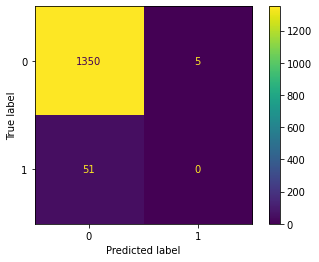

In [41]:
logreg = LogisticRegression().fit(X_train, y_train)

print('Accuracy on training set :', logreg.score(X_train,y_train))
print('Accuracy on testing set :', logreg.score(X_test,y_test))
plot_confusion_matrix(logreg, X=X_test, y_true=y_test)

Even if the the logistic regression has a good accurracy we won't retain this model as it predicted only 3 bankrupted companies and these results were wrong. We mustn't forget that the brankruptcy is what we want to predict.

## Decision Tree

Accuracy on training set : 1.0
Accuracy on testing set : 0.9544807965860598


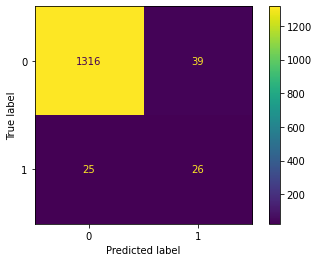

In [42]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy on training set :', dec_tree.score(X_train, y_train))
print('Accuracy on testing set :', dec_tree.score(X_test, y_test))

plot_confusion_matrix(dec_tree, X=X_test, y_true=y_test)

The decision tree has a great accurracy but it stills miss one bankruptcy out of 2. it also lacks of paramater to tune to get better results compared to other models.

## Gaussian Naive Bayes

Accuracy on training set : 0.07080590642234477
Accuracy on testing set : 0.07183499288762446


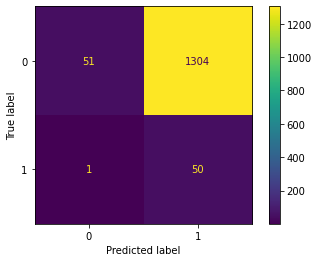

In [43]:
from sklearn.naive_bayes import GaussianNB

gauss_naive = GaussianNB().fit(X_train, y_train)

print('Accuracy on training set :', gauss_naive.score(X_train, y_train))
print('Accuracy on testing set :', gauss_naive.score(X_test, y_test))
plot_confusion_matrix(gauss_naive, X=X_test, y_true=y_test)

The naive bayes has really bad results it has classified almost the results as bankrupted

## Random Forest Classifier

Accuracy on training set : 1.0
Accuracy on testing set : 0.9665718349928877


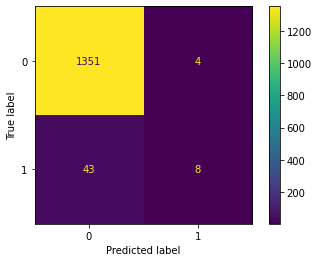

In [44]:
from sklearn.ensemble import RandomForestClassifier

r_forest = RandomForestClassifier().fit(X_train, y_train)

print('Accuracy on training set :', r_forest.score(X_train, y_train))
print('Accuracy on testing set :', r_forest.score(X_test, y_test))

plot_confusion_matrix(r_forest, X=X_test, y_true=y_test)

Even if the accurracy of the random forest model is great it has classified almost all companies as not bankrupted.

## Boosting Classifier

Accuracy on training set : 0.9839886141256005
Accuracy on testing set : 0.9701280227596017


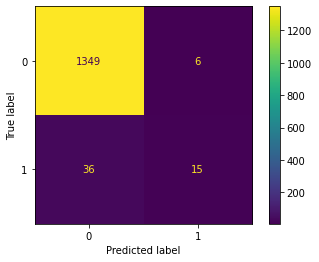

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
boost = GradientBoostingClassifier().fit(X_train,y_train)

print('Accuracy on training set :', boost.score(X_train, y_train))
print('Accuracy on testing set :', boost.score(X_test, y_test))

plot_confusion_matrix(boost, X=X_test, y_true=y_test)

Boosting Tree Classifier achieves a good result but it misses more than half bankruptcies. We musnt forget that it's a very tunable algorithm and that we have a great progression margin.

In [46]:
import numpy as np
vals = boost.predict_proba(X_test)
val = y_test.values
values = [0,0,0,0,0,0,0,0]


i=0
for val in y_test:
    if(val==1 and vals[:,1][i]>0.6):
        values[0]+=1
    elif(val==0 and vals[:,1][i]>0.6):
        values[1]+=1
    elif(val==1 and vals[:,1][i]>0.5):
        values[2]+=1
    elif(val==0 and vals[:,1][i]>0.5):
        values[3]+=1
    elif(val==1 and vals[:,1][i]>0.4):
        values[4]+=1
    elif(val==0 and vals[:,1][i]>0.4):
        values[5]+=1
    elif(val==1):
        values[6]+=1
    else:
        values[7]+=1
    
    i+=1
    

label = ["predicted bankruptcy with certainty rightly","predicted bankruptcy with certainty wrongly", "predicted bankruptcy with uncertainty rightly", "predicted bankruptcy with uncertainty wrongly","predicted no bankruptcy with uncertainty wrongly", "predicted no bankruptcy with uncertainty rightly","predicted no bankruptcy with certainty wrongly", "predicted no bankruptcy with certainty rightly"]
pex.bar(x=label, y=values)

It looks like our dataset has some well defined bankrupted companies, it also has companies in good health and a major part of the bankrupted companies being pretty close from not bankrupted companies

## KNN Classifier

Accuracy on training set : 0.9645970467888276
Accuracy on testing set : 0.9608819345661451


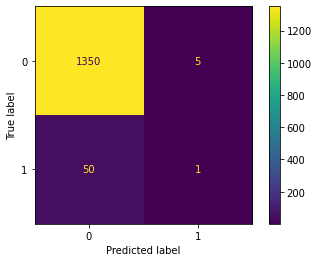

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2).fit(X_train,y_train)

print('Accuracy on training set :', knn.score(X_train, y_train))
print('Accuracy on testing set :', knn.score(X_test, y_test))

plot_confusion_matrix(knn, X=X_test, y_true=y_test)

We have tried a lot of different neighbor number and we cannot find a good result with knn

## Bagging Classifier


Accuracy on training set : 0.9142501334282156
Accuracy on testing set : 0.8961593172119487


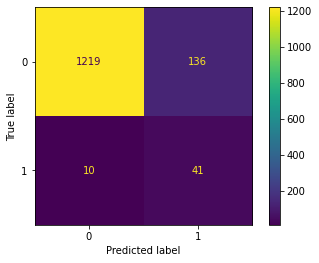

In [48]:
from imblearn.ensemble import BalancedBaggingClassifier

bagg = BalancedBaggingClassifier().fit(X_train, y_train)

print('Accuracy on training set :', bagg.score(X_train, y_train))
print('Accuracy on testing set :', bagg.score(X_test, y_test))


plot_confusion_matrix(bagg, X=X_test, y_true=y_test)

Bagging classifier has great results even though the accurracy is not as high as all the other models. What we want to predict is the bankrupcy it has the best result on precision. But the HIGH number of false positive is big concern imagine if today's COVID tests were predicting almost 5 false positive individuals to the COVID for one person sick that would a catastrophe.

In [49]:
vals = bagg.predict_proba(X_test)
val = y_test.values
values = [0,0,0,0,0,0,0,0]
i=0
for val in y_test:
    if(val==1 and vals[:,1][i]>0.6):
        values[0]+=1
    elif(val==0 and vals[:,1][i]>0.6):
        values[1]+=1
    elif(val==1 and vals[:,1][i]>0.5):
        values[2]+=1
    elif(val==0 and vals[:,1][i]>0.5):
        values[3]+=1
    elif(val==1 and vals[:,1][i]>0.4):
        values[4]+=1
    elif(val==0 and vals[:,1][i]>0.4):
        values[5]+=1
    elif(val==1):
        values[6]+=1
    else:
        values[7]+=1
    
    i+=1
    

label = ["predicted bankruptcy with certainty rightly","predicted bankruptcy with certainty wrongly", "predicted bankruptcy with uncertainty rightly", "predicted bankruptcy with uncertainty wrongly","predicted no bankruptcy with uncertainty wrongly", "predicted no bankruptcy with uncertainty rightly","predicted no bankruptcy with certainty wrongly", "predicted no bankruptcy with certainty rightly"]
pex.bar(x=label, y=values)

    


The results of the bagging tree are more nuanced than the results of the booting trees. But the high false positive rate is seems really concerning

# Boosting tree parameter tuning

## Tuning of the tree
Note that for the optimal parameter research we changed of heuristic, ot assess during our cross validations we use balanced accurracy instead of accurracy hence the lower value that you may see. 

*"The balanced accuracy in binary and multiclass classification problems to deal with imbalanced datasets. It is defined as the average of recall obtained on each class."* source : scikit learn documentation

This is a perfect heuristic for us as we have less than 4% of bankrupted companies
For this part we will follow the path given in supervised learning lecture

We first split the dataset in two parts (one for cross validation and one for a final test)

we have chosen kfold cross validation in order to get a better assement of a model and it's parameters. We will do 3 repeation for each parameter couple. 2 seemed not very robust and we found that 4 repetition was too much, 3 seemed to be a great compromise between ETA and Evaluation of the model. We've chosen 5 split to keep a the classic ratio of 80% for trianing and 20% for testing.


In [50]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV


crossValidator = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.15, stratify=y)

boostingParams={
    'n_estimators':[50,100,500],
    'learning_rate': [0.05,0.1,0.2],
    'max_depth':[2,4,5,6,8,10],
    'max_features':['sqrt', 'log2',None],
    'min_samples_split':[0.2,0.4,0.6,0.8],
    'min_samples_leaf':[0.1,0.2,0.3,0.4]
}

boostingParams={
    'n_estimators':[50,500],#1000 very slow
    'learning_rate': [0.05,0.1,0.2],
    'max_depth':[3,7,10],
    'max_features':['sqrt', 'log2'],# N feature very slow
    'min_samples_split':[0.2,0.4],
    'min_samples_leaf':[0.1,0.2]
}

boostingClassifier = GradientBoostingClassifier()
gridSearch = GridSearchCV(estimator=boostingClassifier, 
                      param_grid=boostingParams, 
                      cv=crossValidator,
                      verbose=1,
                      scoring='balanced_accuracy', 
                      return_train_score=True)

gridSearch.fit(X_train,y_train)




Fitting 15 folds for each of 144 candidates, totalling 2160 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=None),
             estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 7, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [0.1, 0.2],
                         'min_samples_split': [0.2, 0.4],
                         'n_estimators': [50, 500]},
             return_train_score=True, scoring='balanced_accuracy', verbose=1)

In [51]:
results_DT = pd.DataFrame(gridSearch.cv_results_['params'])
results_DT['test_score'] = gridSearch.cv_results_['mean_test_score']

In [52]:
results_DT.sort_values('test_score',ascending=False).head(30)

,learning_rate,max_depth,max_features,min_samples_leaf,min_samples_split,n_estimators,test_score
97,0.20,3,sqrt,0.1,0.2,500,0.599853
115,0.20,7,sqrt,0.1,0.4,500,0.598694
131,0.20,10,sqrt,0.1,0.4,500,0.598578
99,0.20,3,sqrt,0.1,0.4,500,0.590665
139,0.20,10,log2,0.1,0.4,500,0.585650
105,0.20,3,log2,0.1,0.2,500,0.584085
67,0.10,7,sqrt,0.1,0.4,500,0.581825
107,0.20,3,log2,0.1,0.4,500,0.581274
123,0.20,7,log2,0.1,0.4,500,0.579766
51,0.10,3,sqrt,0.1,0.4,500,0.578434


We can see that the model has a much better performing with a high number of estimators and a higher learning rate, and a low number of min sample leaf, let's launch another hyperparameter tuning with paramters around this round's best values.

In [53]:
boostingParams={
    'n_estimators':[400,600],#1000 very slow
    'learning_rate': [0.15,0.25],
    'max_depth':[3,8],
    'max_features':['sqrt', 'log2'],# N feature very slow
    'min_samples_split':[0.1,0.5],
    'min_samples_leaf':[0.05,0.1]
}

boostingClassifier = GradientBoostingClassifier()
gridSearch2 = GridSearchCV(estimator=boostingClassifier, 
                      param_grid=boostingParams, 
                      cv=crossValidator,
                      verbose=1,
                      scoring='balanced_accuracy', 
                      return_train_score=True)

gridSearch2.fit(X_train,y_train)

Fitting 15 folds for each of 64 candidates, totalling 960 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=None),
             estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.15, 0.25], 'max_depth': [3, 8],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [0.05, 0.1],
                         'min_samples_split': [0.1, 0.5],
                         'n_estimators': [400, 600]},
             return_train_score=True, scoring='balanced_accuracy', verbose=1)

In [54]:
results_DT2 = pd.DataFrame(gridSearch2.cv_results_['params'])
results_DT2['test_score'] = gridSearch2.cv_results_['mean_test_score']
results_DT2.sort_values('test_score',ascending=False).head(30)

,learning_rate,max_depth,max_features,min_samples_leaf,min_samples_split,n_estimators,test_score
33,0.25,3,sqrt,0.05,0.1,600,0.639765
51,0.25,8,sqrt,0.05,0.5,600,0.637649
50,0.25,8,sqrt,0.05,0.5,400,0.632925
1,0.15,3,sqrt,0.05,0.1,600,0.628403
41,0.25,3,log2,0.05,0.1,600,0.628200
32,0.25,3,sqrt,0.05,0.1,400,0.626664
43,0.25,3,log2,0.05,0.5,600,0.626577
35,0.25,3,sqrt,0.05,0.5,600,0.625127
3,0.15,3,sqrt,0.05,0.5,600,0.622606
58,0.25,8,log2,0.05,0.5,400,0.620983


In [55]:
boostingParams={
    'n_estimators':[400,600],#1000 very slow
    'learning_rate': [0.18,0.23],
    'max_depth':[3,8],
    'max_features':['sqrt'],# N feature very slow
    'min_samples_split':[0.1,0.5],
    'min_samples_leaf':[0.02,0.005]
}

boostingClassifier = GradientBoostingClassifier()
gridSearch3 = GridSearchCV(estimator=boostingClassifier, 
                      param_grid=boostingParams, 
                      cv=crossValidator,
                      verbose=1,
                      scoring='balanced_accuracy', 
                      return_train_score=True)

gridSearch3.fit(X_train,y_train)

Fitting 15 folds for each of 32 candidates, totalling 480 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=None),
             estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.18, 0.23], 'max_depth': [3, 8],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [0.02, 0.005],
                         'min_samples_split': [0.1, 0.5],
                         'n_estimators': [400, 600]},
             return_train_score=True, scoring='balanced_accuracy', verbose=1)

In [56]:
results_DT3 = pd.DataFrame(gridSearch3.cv_results_['params'])
results_DT3['test_score'] = gridSearch3.cv_results_['mean_test_score']
results_DT3.sort_values('test_score',ascending=False).head(30)

,learning_rate,max_depth,max_features,min_samples_leaf,min_samples_split,n_estimators,test_score
29,0.23,8,sqrt,0.005,0.1,600,0.678578
13,0.18,8,sqrt,0.005,0.1,600,0.678549
21,0.23,3,sqrt,0.005,0.1,600,0.675012
15,0.18,8,sqrt,0.005,0.5,600,0.668056
28,0.23,8,sqrt,0.005,0.1,400,0.667796
24,0.23,8,sqrt,0.020,0.1,400,0.667447
27,0.23,8,sqrt,0.020,0.5,600,0.665592
9,0.18,8,sqrt,0.020,0.1,600,0.665128
31,0.23,8,sqrt,0.005,0.5,600,0.664404
30,0.23,8,sqrt,0.005,0.5,400,0.663679


This step is a great improvement too we think that our mean and split were too high before and they disallowed the tree to create more precise branches.

In [57]:
boostingParams={
    'n_estimators':[700,1000],
    'learning_rate': [0.18,0.23],
    'max_depth':[3,8],
    'max_features':['sqrt'],# N feature very slow
    'min_samples_leaf':[0.02,0.005,0.0025]
}

boostingClassifier = GradientBoostingClassifier()
gridSearch4 = GridSearchCV(estimator=boostingClassifier, 
                      param_grid=boostingParams, 
                      cv=crossValidator,
                      verbose=1,
                      scoring='balanced_accuracy', 
                      return_train_score=True)

gridSearch4.fit(X_train,y_train)

Fitting 15 folds for each of 24 candidates, totalling 360 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=None),
             estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.18, 0.23], 'max_depth': [3, 8],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [0.02, 0.005, 0.0025],
                         'n_estimators': [700, 1000]},
             return_train_score=True, scoring='balanced_accuracy', verbose=1)

In [58]:
results_DT4 = pd.DataFrame(gridSearch4.cv_results_['params'])
results_DT4['test_score'] = gridSearch4.cv_results_['mean_test_score']
results_DT4.sort_values('test_score',ascending=False).head(30)

,learning_rate,max_depth,max_features,min_samples_leaf,n_estimators,test_score
17,0.23,3,sqrt,0.0025,1000,0.689795
15,0.23,3,sqrt,0.0050,1000,0.689157
5,0.18,3,sqrt,0.0025,1000,0.683447
3,0.18,3,sqrt,0.0050,1000,0.682868
4,0.18,3,sqrt,0.0025,700,0.679853
13,0.23,3,sqrt,0.0200,1000,0.678201
16,0.23,3,sqrt,0.0025,700,0.677505
2,0.18,3,sqrt,0.0050,700,0.674288
14,0.23,3,sqrt,0.0050,700,0.673969
12,0.23,3,sqrt,0.0200,700,0.671012


This time we haven't gained accurracy it'is time to stop

Accuracy on training set : 1.0
Accuracy on testing set : 0.9687203791469194


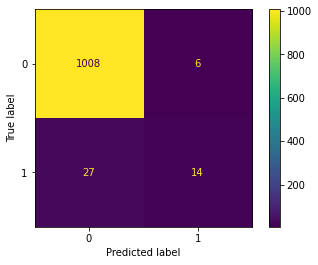

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
boost = GradientBoostingClassifier(learning_rate=0.23,	max_depth=3,	max_features="sqrt",	min_samples_leaf=0.02,	min_samples_split=0.1,	n_estimators=600).fit(X_train,y_train)

print('Accuracy on training set :', boost.score(X_train, y_train))
print('Accuracy on testing set :', boost.score(X_test, y_test))

plot_confusion_matrix(boost, X=X_test, y_true=y_test)

A first confusion matrix to have a look at what we did and finally we haven't gained that much maybe (a little bit because this testing test contains 25% less values including bankrupteds one as we've opted for a stratified repartition) it'is one of the downsides of the balanced accuracy as a small change on the classification of the class with a small number of instances gives the impression of a huge improvement.
Now we will concat all of our best values and have a look at the accurracy on the testing set we isolated before CV, we will see if we ahve overfit or not. We are pretty confident as boosting tree coupled with CV is fairly resitant to overfit

In [60]:
result = [results_DT.sort_values('test_score',ascending=False).head(20),results_DT2.sort_values('test_score',ascending=False).head(20),results_DT3.sort_values('test_score',ascending=False).head(20),results_DT4.sort_values('test_score',ascending=False).head(20)]
result = pd.concat(result)

In [61]:
result = result.fillna(2)
intermediaryResult = result.drop("test_score", axis = 1)
parameters = intermediaryResult.to_dict('r')

Test score is the score returned by the crossValidation and the accurracy score is the one returned by the final test

In [62]:
accurracy = []
for param in parameters:
    if param['min_samples_split']==2.0: param['min_samples_split']=int(2)
    model = GradientBoostingClassifier(learning_rate= param['learning_rate'],max_depth =param['max_depth'],max_features =param['max_features'],min_samples_leaf=param['min_samples_leaf'],n_estimators=param['n_estimators'],min_samples_split=param['min_samples_split'])
    model.fit(X_train,y_train)
    accurracy.append(model.score(X_test, y_test))
result["test_accuracy"]=accurracy
result.sort_values('test_accuracy',ascending=False).head(30)

,learning_rate,max_depth,max_features,min_samples_leaf,min_samples_split,n_estimators,test_score,test_accuracy
3,0.18,3,sqrt,0.0050,2.0,1000,0.682868,0.974408
5,0.18,3,sqrt,0.0025,2.0,1000,0.683447,0.973460
9,0.18,8,sqrt,0.0050,2.0,1000,0.637622,0.973460
17,0.23,3,sqrt,0.0025,2.0,1000,0.689795,0.973460
4,0.18,3,sqrt,0.0025,2.0,700,0.679853,0.972512
13,0.18,8,sqrt,0.0050,0.1,600,0.678549,0.972512
29,0.23,8,sqrt,0.0050,0.1,600,0.678578,0.972512
20,0.23,8,sqrt,0.0050,2.0,700,0.651941,0.972512
0,0.18,3,sqrt,0.0200,2.0,700,0.670317,0.971564
16,0.23,3,sqrt,0.0025,2.0,700,0.677505,0.971564


Accuracy on training set : 1.0
Accuracy on testing set : 0.9744075829383886


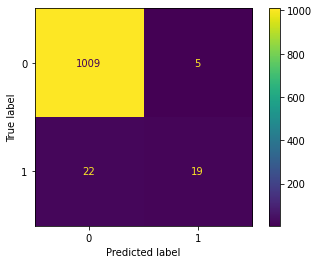

In [63]:
boost2 = GradientBoostingClassifier(learning_rate=0.18,	max_depth=3,	max_features="sqrt",	min_samples_leaf=0.005,	min_samples_split=2,	n_estimators=1000).fit(X_train,y_train)

print('Accuracy on training set :', boost2.score(X_train, y_train))
print('Accuracy on testing set :', boost2.score(X_test, y_test))

plot_confusion_matrix(boost2, X=X_test, y_true=y_test)

In [64]:
import numpy as np
vals = boost2.predict_proba(X_test)
val = y_test.values
values = [0,0,0,0,0,0,0,0]

i=0
for val in y_test:
    if(val==1 and vals[:,1][i]>0.6):
        values[0]+=1
    elif(val==0 and vals[:,1][i]>0.6):
        values[1]+=1
    elif(val==1 and vals[:,1][i]>0.5):
        values[2]+=1
    elif(val==0 and vals[:,1][i]>0.5):
        values[3]+=1
    elif(val==1 and vals[:,1][i]>0.4):
        values[4]+=1
    elif(val==0 and vals[:,1][i]>0.4):
        values[5]+=1
    elif(val==1):
        values[6]+=1
    else:
        values[7]+=1 
    i+=1
    

label = ["predicted bankruptcy with certainty rightly","predicted bankruptcy with certainty wrongly", "predicted bankruptcy with uncertainty rightly", "predicted bankruptcy with uncertainty wrongly","predicted no bankruptcy with uncertainty wrongly", "predicted no bankruptcy with uncertainty rightly","predicted no bankruptcy with certainty wrongly", "predicted no bankruptcy with certainty rightly"]
pex.bar(x=label, y=values)

The paramaeter tuning has ugraded the tree's acccuracy but it's sensivity (nuance) remains quietely the same.

In [65]:
tab = []
realnames = open("VarNames.txt","r").read().split("\n")
importance = boost2.feature_importances_
for i in range (len(X_train.columns)):
    tab.append([realnames[i], importance[i],1])
tab.sort(reverse=True,key = lambda x:x[1])
name = []
value = []
importancesinthesys = pd.DataFrame(tab)
importancesinthesys.columns = ["name","value","year"]
for line in tab:
    name.append(line[0])
    value.append(line[1])
pex.bar(x=name, y= value)


In [66]:
pickle.dump(boost2,open("modelyear1.save", "wb"))

# Misisng values filling (year 2,3,4,5)

The next function does what we did in the first part. It looks for the missing data and replaces it with a linear regression extrapolation. We give in input  the fillename of the sourcefile and it returns a treated dataset.


In [67]:
def ReadDfAndValueFiller(filename):
    filecontent = arff.loadarff(filename)
    untreateddata = pd.DataFrame(filecontent[0])
    untreateddata.columns = ["X{}".format(i+1) for i in range(untreateddata.shape[1]-1)]+["bankruptcy"]
    mediandatafill = untreateddata.fillna(untreateddata.median())
    missingvaluesstat =pd.DataFrame(untreateddata.isna().sum())
    missingvaluesstat["percentage"] = untreateddata.isna().sum()*100/float(untreateddata.shape[0])
    missingvaluesstat.columns=["number","percentage"]
    pex.bar(missingvaluesstat,y="number", color="percentage",title="Number of missing values per variable").show()

    trainingMLRfill = untreateddata.dropna(how="any")
    trainingDatafill,labelfill = trainingMLRfill.drop("bankruptcy", axis=1),trainingMLRfill["bankruptcy"]
    trainingDatafill.head()
    i = 0
    mins = untreateddata.min()
    maxs = untreateddata.max()
    #we first train the models
    modelsfill = []
    
    for column in trainingDatafill:
        trainingfill,resultfill = trainingDatafill.drop(column,axis = 1), trainingDatafill[column]
        modelfill = LinearRegression()
        modelfill.fit(trainingfill,resultfill)

        modelsfill.append(modelfill)
        i+=1
    treatedDatafill = copy.deepcopy(untreateddata)
    j = 0

    #Then we go over each case and if it is nan we fill the values thanks to a linear regression
    for column in treatedDatafill:
        if column=="bankruptcy":
            break
        current = mediandatafill.drop(column,axis=1).drop("bankruptcy",axis=1)
        for i in range(len(treatedDatafill)):
            if math.isnan(treatedDatafill.iloc[i,j]):
                value = models[j].predict(current.iloc[[i]])
                value = min(value,maxs[column])
                
                
                if(mins[column]<0):
                    treshold = mins[column]*1.1
                else:
                    treshold = mins[column]*0.9
                value = max(treshold,value)
                treatedDatafill.iloc[i,j] = value
        
        j+=1
    variation = pd.DataFrame()
    variation["Mean rate of change"] = (untreateddata.mean()-treatedDatafill.mean())/untreateddata.mean()
    variation["Median rate of change"] = (untreateddata.median()-treatedDatafill.median())/untreateddata.median()
    pex.line(variation,y=["Mean rate of change","Median rate of change"]).show()
    return treatedDatafill


We have 30 % on average value of variable 21 it may seem enormous and it is, but we have to keep in mind that even before the data treatement the data was very heterogenous, and most of the value where low excepting some extremums that our model catched.

In [69]:
step2Data = [0,0,0,0]
step2Data[0] = ReadDfAndValueFiller("2year.arff")

In [70]:
step2Data[1] = ReadDfAndValueFiller("3year.arff")

In [71]:
step2Data[2] = ReadDfAndValueFiller("4year.arff")

In [73]:
step2Data[3] = ReadDfAndValueFiller("5year.arff")

# Hyper parameter optimization (Tree 2,3,4,5)

For the hyper parameters let's check the best performing ones from the previous exercise and test them:

In [74]:
for column in result.sort_values('test_accuracy',ascending=False).head(10):
    print(result.head(20)[column].value_counts())
result.sort_values('test_accuracy',ascending=False).head(10).drop("test_score",axis=1)

0.2    12
0.1     8
Name: learning_rate, dtype: int64
7     7
3     7
10    6
Name: max_depth, dtype: int64
sqrt    12
log2     8
Name: max_features, dtype: int64
0.1    20
Name: min_samples_leaf, dtype: int64
0.2    10
0.4    10
Name: min_samples_split, dtype: int64
500    20
Name: n_estimators, dtype: int64
0.599853    1
0.579766    1
0.569999    1
0.577680    1
0.578434    1
0.570462    1
0.598694    1
0.581274    1
0.570752    1
0.569043    1
0.577505    1
0.573332    1
0.566144    1
0.585650    1
0.581825    1
0.573362    1
0.598578    1
0.578201    1
0.590665    1
0.584085    1
Name: test_score, dtype: int64
0.963981    6
0.965877    3
0.961137    2
0.960190    2
0.967773    2
0.962085    1
0.959242    1
0.964929    1
0.966825    1
0.968720    1
Name: test_accuracy, dtype: int64


,learning_rate,max_depth,max_features,min_samples_leaf,min_samples_split,n_estimators,test_accuracy
3,0.18,3,sqrt,0.0050,2.0,1000,0.974408
5,0.18,3,sqrt,0.0025,2.0,1000,0.973460
9,0.18,8,sqrt,0.0050,2.0,1000,0.973460
17,0.23,3,sqrt,0.0025,2.0,1000,0.973460
4,0.18,3,sqrt,0.0025,2.0,700,0.972512
13,0.18,8,sqrt,0.0050,0.1,600,0.972512
29,0.23,8,sqrt,0.0050,0.1,600,0.972512
20,0.23,8,sqrt,0.0050,2.0,700,0.972512
0,0.18,3,sqrt,0.0200,2.0,700,0.971564
16,0.23,3,sqrt,0.0025,2.0,700,0.971564


This function makes k fold cross validation and then returns the parameters associated to it's results  

In [75]:
def crossValidate(inputDataframe):
    yn,Xn = inputDataframe["bankruptcy"],inputDataframe.drop("bankruptcy", axis=1)
    yn = yn.astype("int64")    
    crossValidator = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
    X_tr, X_tst, y_tr, y_tst = train_test_split(Xn,yn, test_size = 0.15, stratify=yn)

    boostingParams={
    'n_estimators':[700,1000],
    'learning_rate': [0.18,0.23],
    'max_depth':[3],
    'max_features':['sqrt'],
    'min_samples_leaf':[0.005,0.0025]
    }

    boostingClassifier = GradientBoostingClassifier()
    gridSearchn = GridSearchCV(estimator=boostingClassifier, 
                        param_grid=boostingParams, 
                        cv=crossValidator,
                        verbose=2,
                        scoring='balanced_accuracy', 
                        return_train_score=True)

    gridSearchn.fit(X_tr,y_tr)
    results = pd.DataFrame(gridSearchn.cv_results_['params'])
    results['test_score'] = gridSearchn.cv_results_['mean_test_score']
    results.sort_values('test_score',ascending=False).head(30)
    intermediaryResult = results.drop("test_score", axis = 1)
    parameter = intermediaryResult.to_dict('r')
    accurracy = []
    for param in parameter:
        model = GradientBoostingClassifier(learning_rate= param['learning_rate'],max_depth =param['max_depth'],max_features =param['max_features'],min_samples_leaf=param['min_samples_leaf'],n_estimators=param['n_estimators'])
        model.fit(X_train,y_train)
        accurracy.append(model.score(X_tst, y_tst))
    results["test_accuracy"]=accurracy
    
    return results.sort_values('test_accuracy',ascending=False).head(30)



In [77]:
from threading import Thread

threads = []
for dataframes in step2Data:
    threads.append(crossValidate(dataframes))
    

] END learning_rate=0.23, max_depth=3, max_features=sqrt, min_samples_leaf=0.005, n_estimators=1000; total time=  15.9s
[CV] END learning_rate=0.23, max_depth=3, max_features=sqrt, min_samples_leaf=0.005, n_estimators=1000; total time=  16.4s
[CV] END learning_rate=0.23, max_depth=3, max_features=sqrt, min_samples_leaf=0.005, n_estimators=1000; total time=  15.9s
[CV] END learning_rate=0.23, max_depth=3, max_features=sqrt, min_samples_leaf=0.005, n_estimators=1000; total time=  16.6s
[CV] END learning_rate=0.23, max_depth=3, max_features=sqrt, min_samples_leaf=0.005, n_estimators=1000; total time=  16.4s
[CV] END learning_rate=0.23, max_depth=3, max_features=sqrt, min_samples_leaf=0.005, n_estimators=1000; total time=  16.4s
[CV] END learning_rate=0.23, max_depth=3, max_features=sqrt, min_samples_leaf=0.005, n_estimators=1000; total time=  15.9s
[CV] END learning_rate=0.23, max_depth=3, max_features=sqrt, min_samples_leaf=0.005, n_estimators=1000; total time=  15.8s
[CV] END learning_r

In [78]:
tm2 = time.perf_counter()
print(tm2)
h = round((tm2-tm)/3600)
m = round(((tm2-tm)%3600)/60)
s = round(((tm2-tm)%3600)%60)
print("took {}h {}m {}s".format(h,m,s))

34363.8923675
took 9h 28m 43s


On all of these models the accurracy is pretty good for some variables we find way better results than other teams on internet

In [79]:
threads[0]


,learning_rate,max_depth,max_features,min_samples_leaf,n_estimators,test_score,test_accuracy
0,0.18,3,sqrt,0.0050,700,0.625384,0.965269
1,0.18,3,sqrt,0.0050,1000,0.631737,0.961992
5,0.23,3,sqrt,0.0050,1000,0.636639,0.961992
4,0.23,3,sqrt,0.0050,700,0.632697,0.957405
3,0.18,3,sqrt,0.0025,1000,0.637619,0.956750
6,0.23,3,sqrt,0.0025,700,0.632987,0.955439
2,0.18,3,sqrt,0.0025,700,0.622503,0.954784
7,0.23,3,sqrt,0.0025,1000,0.640890,0.954128


In [80]:
threads[1]

,learning_rate,max_depth,max_features,min_samples_leaf,n_estimators,test_score,test_accuracy
5,0.23,3,sqrt,0.0050,1000,0.648234,0.956853
1,0.18,3,sqrt,0.0050,1000,0.648945,0.953680
4,0.23,3,sqrt,0.0050,700,0.648193,0.953046
0,0.18,3,sqrt,0.0050,700,0.646205,0.949873
3,0.18,3,sqrt,0.0025,1000,0.651374,0.948604
6,0.23,3,sqrt,0.0025,700,0.649057,0.946066
7,0.23,3,sqrt,0.0025,1000,0.656377,0.946066
2,0.18,3,sqrt,0.0025,700,0.639061,0.940990


In [81]:
threads[2]

,learning_rate,max_depth,max_features,min_samples_leaf,n_estimators,test_score,test_accuracy
1,0.18,3,sqrt,0.0050,1000,0.698422,0.959156
2,0.18,3,sqrt,0.0025,700,0.690033,0.955752
5,0.23,3,sqrt,0.0050,1000,0.702315,0.955752
0,0.18,3,sqrt,0.0050,700,0.694584,0.955071
3,0.18,3,sqrt,0.0025,1000,0.696676,0.953029
4,0.23,3,sqrt,0.0050,700,0.693884,0.950306
7,0.23,3,sqrt,0.0025,1000,0.698781,0.950306
6,0.23,3,sqrt,0.0025,700,0.693708,0.942818


In [82]:
threads[3]

,learning_rate,max_depth,max_features,min_samples_leaf,n_estimators,test_score,test_accuracy
0,0.18,3,sqrt,0.0050,700,0.740999,0.948140
4,0.23,3,sqrt,0.0050,700,0.737411,0.948140
5,0.23,3,sqrt,0.0050,1000,0.741609,0.948140
6,0.23,3,sqrt,0.0025,700,0.742086,0.947012
7,0.23,3,sqrt,0.0025,1000,0.746847,0.947012
3,0.18,3,sqrt,0.0025,1000,0.741312,0.945885
1,0.18,3,sqrt,0.0050,1000,0.738732,0.944758
2,0.18,3,sqrt,0.0025,700,0.741526,0.943630


# Feature Importance (year 2,3,4,5)

In [83]:
params = [{"learning_rate":0.18, "max_depth":3, "max_features":"sqrt", "min_samples_leaf":0.005, "min_samples_split":2, "n_estimators":700},
{"learning_rate":0.23, "max_depth":3, "max_features":"sqrt", "min_samples_leaf":0.0025, "min_samples_split":2, "n_estimators":700},
{"learning_rate":0.18, "max_depth":3, "max_features":"sqrt", "min_samples_leaf":0.005, "min_samples_split":2, "n_estimators":700},
{"learning_rate":0.18, "max_depth":3, "max_features":"sqrt", "min_samples_leaf":0.005, "min_samples_split":2, "n_estimators":1000}]


i = 0
def modelStat(param, modelNumber):
    y,X = step2Data[modelNumber]["bankruptcy"],step2Data[modelNumber].drop("bankruptcy", axis=1)
    y = y.astype("int64")
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
    boost3 = GradientBoostingClassifier(learning_rate=0.18,	max_depth=3,	max_features="sqrt",	min_samples_leaf=0.005,	min_samples_split=2,	n_estimators=1000).fit(X_train,y_train)

    print('Accuracy on training set :', boost3.score(X_train, y_train))
    print('Accuracy on testing set :', boost3.score(X_test, y_test))


    
    
    tab = []
    realnames = open("VarNames.txt","r").read().split("\n")
    importance = boost3.feature_importances_
    for i in range (len(X_train.columns)):
        tab.append([realnames[i], importance[i],modelNumber+2])
    tab.sort(reverse=True,key = lambda x:x[1])
    temp = pd.DataFrame(tab)
    temp.columns = ["name","value","year"]
    pickle.dump(boost2,open("modelyear"+str(modelNumber+2)+".save", "wb"))
    
    name = []
    value = []
    for line in tab:
        name.append(line[0])
        value.append(line[1])
    fig = pex.bar(x=name, y= value)
    fig.show()
    plot_confusion_matrix(boost3, X=X_test, y_true=y_test)
    return temp
    

    

Variable importance and confusion matrix the best model of the second year

Accuracy on training set : 1.0
Accuracy on testing set : 0.9739557739557739


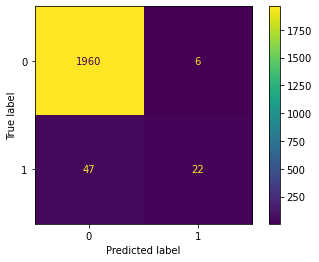

In [84]:
i=0
importancesinthesys=importancesinthesys.append(modelStat([i],i),ignore_index=True)
i+=1


Variable importance and confusion matrix the best model of the third year

Accuracy on training set : 1.0
Accuracy on testing set : 0.9595430747263208


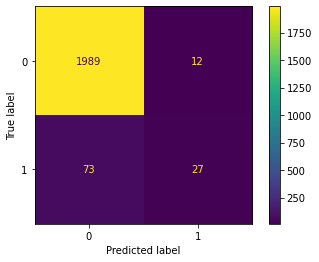

In [85]:
importancesinthesys=importancesinthesys.append(modelStat([i],i),ignore_index=True)
i+=1

Variable importance and confusion matrix the best model of the fourth year

Accuracy on training set : 1.0
Accuracy on testing set : 0.9632465543644717


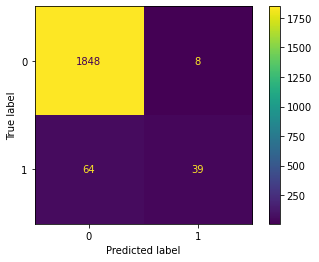

In [86]:
importancesinthesys=importancesinthesys.append(modelStat([i],i),ignore_index=True)
i+=1

Variable importance and confusion matrix the best model of the fifth year

Accuracy on training set : 1.0
Accuracy on testing set : 0.9534686971235194


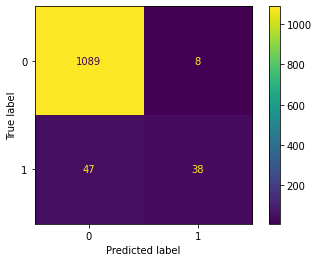

In [87]:
importancesinthesys=importancesinthesys.append(modelStat([i],i),ignore_index=True)
i+=1

Average importance for each variable over all the years

In [88]:
overallimportance = importancesinthesys.groupby(['name'])["value"].sum().sort_values(ascending=False)/5
pex.bar(overallimportance)

Average importance for each variable over all the years grouped by vriable with year detail as we can see the first 5 ones are standing out of the rest of the variables

In [89]:
importancesinthesys["year"]=importancesinthesys["year"].astype(str)
ordering = []
for value in importancesinthesys["name"]:
    ordering.append(overallimportance[value])
importancesinthesys["ordering"]=ordering
importancesinthesys = importancesinthesys.sort_values(by=['ordering'], ascending=False)
pex.bar(importancesinthesys.head(80),x="name",y="value",color="year",barmode="group")


In [90]:
pex.bar(importancesinthesys.head(100),x="name",y="value",color="year")

Script to export the median values for each variable (to fill the missing values as we wont ask to the suser it's own income statement)

In [91]:
i = 2
for dataframes in step2Data:
    pickle.dump(dataframes.median(),open("medianyear"+str(i)+".save", "wb"))
    i+=1

Script to export some data of the datatsets in order toal them in the database to display thewebsite user some example

In [103]:
dfs = [treatedData]+step2Data
i = 1

for df in dfs:
    temp = pd.DataFrame()
    
    for column in df.columns[:12]:
        temp[column] = df[column]
    temp["bankruptcy"] = df["bankruptcy"]
    pickle.dump(temp,open("data"+str(i)+".save", "wb"))
    i+=1
    
